In this analysis I used Data Quest's Jupyter Notebook Tutorial to achieve the following:
- Familiarize myself with Jupyter Notebook
- Practice basic Exploratory Data Analysis (EDA) with Python

In this analysis, I extended the tutorial by:
- Providing my thoughts on the EDA
- Made sure there NULL or NaN values did not exist

Future Analyses:
- See if there is a relationship between household median income and Fortune 500 profit over time
- Compare the standard deviation of profit/revenue between the top 10 Fortune 500 companies and the bottom 10 Fortune 500 companies


Source: https://www.dataquest.io/blog/jupyter-notebook-tutorial/


Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Load in data with read_csv from the pandas library

In [2]:
df = pd.read_csv('downloads/fortune500.csv')

Taking a quick glance at our data. It seems like we have data starting in 1955.

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


Renaming the Revenue and Profit columns so it will be easier to reference later on in the analysis. I will be removing the "(in millions)"

In [4]:
df.rename(columns={'Revenue (in millions)':'Revenue', 'Profit (in millions)':'Profit'}, inplace = True)
list(df.columns.values)

['Year', 'Rank', 'Company', 'Revenue', 'Profit']

Now that our column headers have been updated. Let's take a look at our data types in this data set. It looks like the Profit column is a data object instead of a float.

In [5]:
df.dtypes

Year         int64
Rank         int64
Company     object
Revenue    float64
Profit      object
dtype: object

This is most likely due to some values in the profit column being non-numeric values. Using regular expressions we can find the indicies where a non-numeric value appears.

In [6]:
non_numeric_profit = df.Profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profit].head()


,Year,Rank,Company,Revenue,Profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


It seems like the profit column has missing numeric values. In its place is "N.A.". This is a bit different than NULL or NaN values. This is a literal string value. I want to see how many "N.A" there are.

In [7]:
countOfNA = df.Profit[non_numeric_profit].count()
print('There are %d "N.A." values' %countOfNA)

There are 369 "N.A." values


Let's also check to see if there is any missing data (NULL) or NA values (NaN) in any other columns. 

In [8]:
df.isnull().sum()


Year       0
Rank       0
Company    0
Revenue    0
Profit     0
dtype: int64

In [9]:
df.isna().sum()

Year       0
Rank       0
Company    0
Revenue    0
Profit     0
dtype: int64

Visualize the distribution of non-numeric profit values over time.

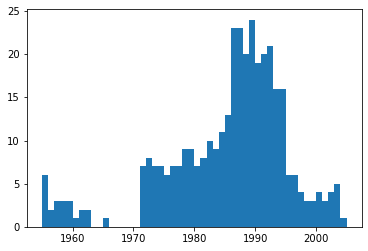

In [10]:
bin_sizes, _, _ = plt.hist(df.Year[non_numeric_profit], bins=range(1955,2006))

Relatively there are more "N.A." profit values during the 90's. But again there are less than 25 "N.A." values per year. I will go ahead and remove these values. I'll also convert the Profit column from object to numeric. In a future analysis I might come back and do something a little bit more sophisticated!

In [11]:
df = df.loc[~non_numeric_profit]
df.Profit = df.Profit.apply(pd.to_numeric) #converting all values in the profit column to numeric

In [12]:
df.dtypes

Year         int64
Rank         int64
Company     object
Revenue    float64
Profit     float64
dtype: object

Plotting the average profits of Fortune 500 companies by year

In [13]:
group_by_year = df.loc[:, ['Year', 'Revenue', 'Profit']].groupby('Year')
avg = group_by_year.mean()

x = avg.index
y1 = avg.Profit

def plot(x,y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0, y=0)

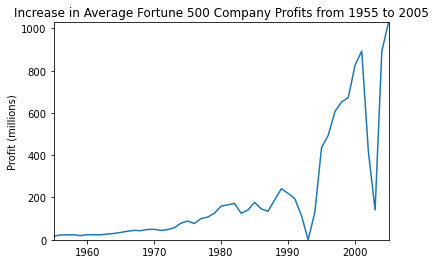

In [14]:
fig, ax = plt.subplots()
plot(x,y1,ax, "Increase in Average Fortune 500 Company Profits from 1955 to 2005", "Profit (millions)")

Profits dipped down drastically in the early 90's. This is most likely due to the recession that occurred around that time. It is interesting to see profits spike back up almost immediately.

Plotting the average revenues of Fortune 500 companies by year. Hopefully this will give more insight as to how profits were able to bounce back so quick.

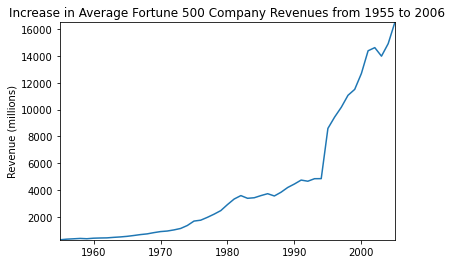

In [15]:
y2 = avg.Revenue
fix, ax = plt.subplots()
plot(x,y2,ax,"Increase in Average Fortune 500 Company Revenues from 1955 to 2006","Revenue (millions)")

Plotting standard deviation and average for profit and revenue.

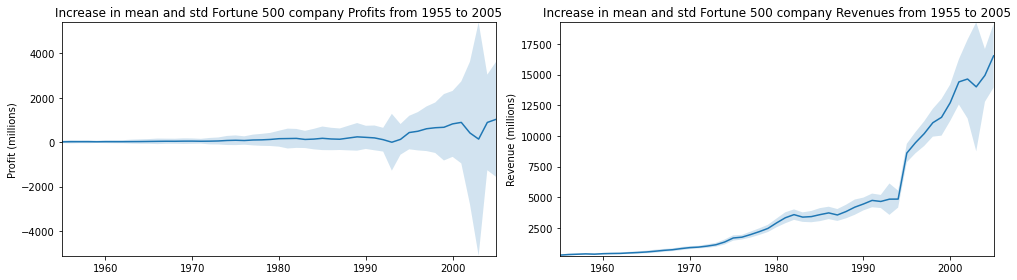

In [16]:
def plot_with_std(x, y, std, ax, title, y_label):
    ax.fill_between(x, y - std, y + std, alpha = 0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'

#Calculate Standard Deviation
std1 = group_by_year.std().Profit.values
std2 = group_by_year.std().Revenue.values

#Plot Revenue and Profit Standard Deviation Chart
plot_with_std(x, y1.values, std1, ax1, title % 'Profits', 'Profit (millions)')
plot_with_std(x, y2.values, std1, ax2, title % 'Revenues', 'Revenue (millions)')
fig.set_size_inches(14,4)
fig.tight_layout()

Overtime we can see that the standard deviation for profit has increased drastically.